# Sentiment Analysis with TextBlob

Please note that `final_notebook.ipynb` and other public-facing documents use VADER's sentiment analysis found in `VADER_sentiment.ipynb`.

This is because VADER is a lexicon designed specifically for social media sentiments, therefore it performed better on this Twitter data.

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns

## Importing `clean_df`

In [3]:
from google.colab import files
data_to_load = files.upload()
import io
clean_df = pd.read_pickle(io.BytesIO(data_to_load['clean_df.pkl']))

Saving clean_df.pkl to clean_df.pkl


In [4]:
clean_df.head(2)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...


## Sentiment of Tweets

In [5]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [6]:
clean_df['polarity'] = clean_df['clean_tweets'].apply(pol)
clean_df['subjectivity'] = clean_df['clean_tweets'].apply(sub)

In [7]:
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets,polarity,subjectivity
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...,0.000000,0.000000
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...,-0.700000,0.666667
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...,-0.333333,0.700000
3,3,0,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,0.000000,0.000000
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or...,0.075000,0.725000


In [8]:
# new dataframe with average polarity score for each label
scores_df = clean_df.groupby('label')['polarity'].mean().reset_index(name='avg_polarity')
# adding column with average subjectivity score for each label
scores_df['avg_subjectivity'] = clean_df.groupby('label')['subjectivity'].mean()


In [9]:
# checking that it worked
scores_df.head()

,label,avg_polarity,avg_subjectivity
0,0,0.006440,0.372270
1,1,-0.071377,0.394256


### Interpreting Sentiment Scores
- **Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.
- **Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Non hate speech tweets are on average kind of "neutral" with a .6% positivity. It makes sense that these would be weighed down by negativity, because it's mainly offensive language.

Hate speech could also be considered "neutral" but leaning a little towards the negative side with 7% negativity. It's pretty suprising that neither of these labels are skewed heavily towards a polarity.

On average, both hate speech and non hate speech have a pretty simliar level of opinion. Hate speech tweets are about 39% opnionated and non Hate Speech tweets are about 37% opinionated.

It seems that these scores may not be too accurate? This could be attributed to the fact that these scores are averaged. We could try other sentiment analysis packages to see if anything changes.

## Density Plot for Each Sentiment Score

In [ ]:
# visualize with bar plot

In [ ]:
# what else can we do with sentiment analysis?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


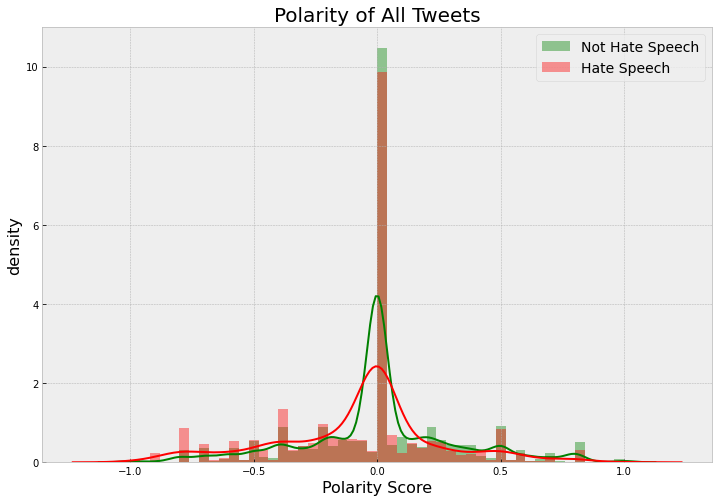

In [10]:
# creating density plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(clean_df['polarity'][clean_df['label'] == 0], label='Not Hate Speech', color='green')
ax = sns.distplot(clean_df['polarity'][clean_df['label'] == 1], label='Hate Speech', color='red')
# setting label, title and legend
ax.set_title('Polarity of All Tweets', fontsize=20)
ax.set_ylabel('density', fontsize=16)
ax.set_xlabel('Polarity Score', fontsize=16)
ax.legend(prop=dict(size=14))

From this denisty plot, we can see that a majoirty of tweets in both classifications rank a fairly neutral. This doesn't seem accurate, and could be attributated to TextBlob's inability to score social media sentiment.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


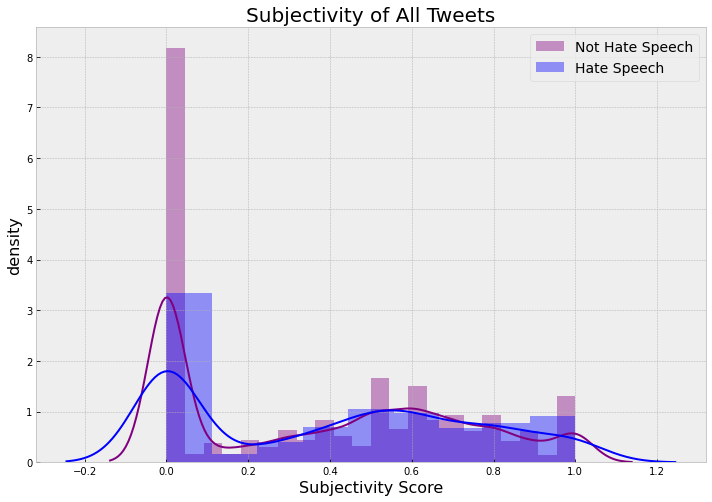

In [11]:
# creating density plot for each label's subjectivity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(clean_df['subjectivity'][clean_df['label'] == 0], label='Not Hate Speech', color='purple')
ax = sns.distplot(clean_df['subjectivity'][clean_df['label'] == 1], label='Hate Speech', color='blue')
# setting label, title and legend
ax.set_title('Subjectivity of All Tweets', fontsize=20)
ax.set_ylabel('density', fontsize=16)
ax.set_xlabel('Subjectivity Score', fontsize=16)
ax.legend(prop=dict(size=14))

Again, we can see that a majority of both types of tweets have a fairly neutral subjectivity. This doesnt seem accurate either.

### Bar Chart of Sentiment Scores by Tweet Type

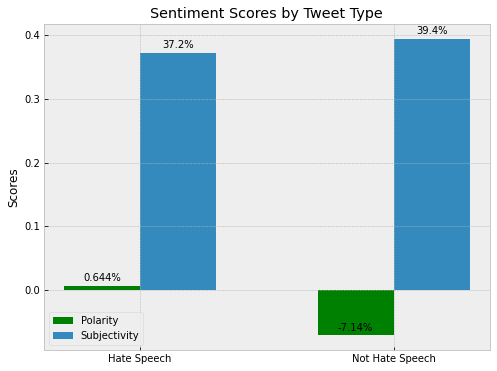

In [12]:
labels = ['Hate Speech', 'Not Hate Speech']
all_polarity = clean_df['polarity'].groupby(clean_df['label']).mean()
all_subjectivity = clean_df['subjectivity'].groupby(clean_df['label']).mean()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

ax1 = ax.bar(x - width/2, all_polarity, width, label='Polarity', color='g')
ax2 = ax.bar(x + width/2, all_subjectivity, width, label='Subjectivity')

def autolabel(rects):
    """Add a text label above bars to display its perentage of data."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height * 100) + '%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# applying function
autolabel(ax1)
autolabel(ax2)

# setting axis labels, title and legend location
ax.set_ylabel('Scores')
ax.set_title('Sentiment Scores by Tweet Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)

## TextBlob's Scoring

From these results, it seems that TextBlob isn't a reliable semtiment analysis tool for social media data, where the text is so non-sensical.

With so much offensive language and hate speech, you would assume that the polarity and subjectivity scores should be much more skewed.

We can try using `Vader`, which is a rule-based lexicon designed specifically for social media sentiments. That can be found in `VADER_sentiment.ipynb`. 